In [1]:
from utils import SurrogatPyRepEnvironment
from basic_walk.utils import BaseAgent
import sys
import time

from multiprocessing import Pool
import pickle
import matplotlib.pyplot as plt
import numpy as np

from tqc import structures, DEVICE
from tqc.trainer import Trainer
from tqc.structures import Actor, Critic, RescaleAction
from tqc.functions import eval_policy
from tqdm import tqdm
import copy

import warnings
warnings.filterwarnings('ignore')

# Загружаем игры

In [2]:
def split_episode(episode):
    res = dict(
        states=[],
        actions=[],
        next_states=[],
        rewards=[],
        dones=[]
    )
    for state, action, next_state, reward, done in episode:
        res["states"].append(state)
        res["actions"].append(action * np.pi)
        res["next_states"].append(next_state)
        res["rewards"].append(reward)
        res["dones"].append(done)
    res["rewards"] = np.array(res["rewards"])
    return res

In [9]:
buffer_name = "replay_buffer_leg_only"
goal_len = 160000
# goal_len = 96000
episode_length = 500

file_name = f"data/replay_buffers/{buffer_name}_array_{goal_len}_{episode_length}.pickle"
with open(file_name, 'rb') as f:
    replay_buffer_arr = pickle.load(f)
    
episodes = []
for episode_start in range(0, goal_len, episode_length):
    episodes.append(split_episode(replay_buffer_arr[episode_start : episode_start + episode_length]))

In [10]:
max_idx = None
max_value = np.inf

for i, episode in enumerate(episodes):
    curr_r = episode["rewards"].sum()
    
    if curr_r > 0 and curr_r < max_value:
        max_value = curr_r
        max_idx = i

1


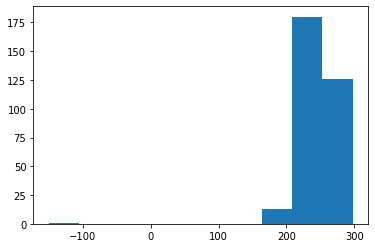

In [11]:
rewards_sum = []
for episode in episodes:
    r = np.sum(episode["rewards"])
    rewards_sum.append(r)

rewards_sum = np.array(rewards_sum)
print(len(rewards_sum[rewards_sum < 0]))

plt.hist(rewards_sum)
plt.show()

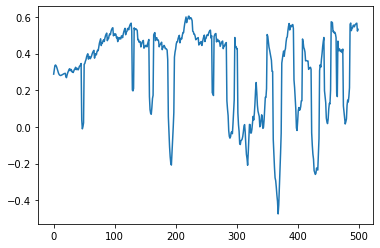

In [6]:
r = episodes[max_idx]["rewards"]
# plt.title(f"{max_idx}-episode with r={r.sum()}")
    
plt.plot(r)
    
plt.show()

# Display Replay

In [8]:
actions = episodes[max_idx]["actions"]
new_info = []
with SurrogatPyRepEnvironment('scenes/basic_scene.ttt', headless_mode=False, foot_only_mode=True) as env:
#     for _ in range(20):
#         env.reset()
#         time.sleep(4 / 20)
    env.reset()
    for action in actions:
        _, _, _, curr_info = env.step(action)
        new_info.append(curr_info)
#         time.sleep()

# Analyse new info

In [27]:
def extract_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    return param

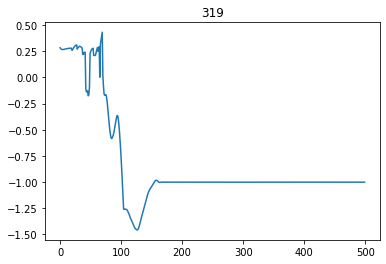

In [43]:
param = extract_param(new_info, "reward")
plt.title(i)
plt.plot(param)
plt.show()